# HYPOTHESIS TESTING

- Hypothesis test for the difference between means of two populations.

- Hypothesis Testing is a type of statistical analysis in which you put your assumptions about a population parameter to the test. It is used to estimate the relationship between 2 statistical variables.

- For example, a company is claiming that their average sales for this quarter are 1000 units. This is an example of a simple hypothesis. Suppose the company claims that the sales are in the range of 900 to 1000 units. Then this is a case of a composite hypothesis.




- **Level of Significance** : The alpha value is a criterion for determining whether a test statistic is statistically significant. In a statistical test, Alpha represents an acceptable probability of a Type I error. Because alpha is a probability, it can be anywhere between 0 and 1. In practice, the most commonly used alpha values are 0.01, 0.05, and 0.1, which represent a 1%, 5%, and 10% chance of a Type I error, respectively (i.e. rejecting the null hypothesis when it is in fact correct).  **(For results with a 90 percent level of confidence, the value of alpha is 1 — 0.90 = 0.1)**

- **P-Value** : A p-value is a metric that expresses the likelihood that an observed difference could have occurred by chance. As the p-value decreases the statistical significance of the observed difference increases. If the p-value is too low, you reject the null hypothesis.

# ONE / TWO SAMPLE T-TEST

- **The One-Tailed t-test**, also called a directional test, considers a critical region of data that would result in the null hypothesis being rejected if the test sample falls into it, inevitably meaning the acceptance of the alternate hypothesis. In a one-tailed test, the critical distribution area is one-sided, meaning the test sample is either greater or lesser than a specific value.

If H0: mean >=50, then H1: mean <50

Here the mean is less than 50. It is called a One-tailed test.

- **The Two-Tailed t-test**, the test sample is checked to be greater or less than a range of values in a Two-Tailed test, implying that the critical distribution area is two-sided. If the sample falls within this range, the alternate hypothesis will be accepted, and the null hypothesis will be rejected.

Suppose H0: mean = 50 and H1: mean not equal to 50.

According to the H1, the mean can be greater than or less than 50. This is an example of a Two-tailed test.

# PROJECT INFORMATION

We want to test the effect of using two different fertilizers on tomato plants. For this, we apply these two fertilizers to the plants in two fields, A and B, and wait for the plants to grow. Then, we take two random samples of plants from both fields and measure their heights. Our goal is to determine if the plants exposed to one of the two fertilizers have grown higher, on average.

# STATISTICAL ASSUMPTIONS FOR 2-SAMPLE T-TEST

For the results of a 2-sample t-test to be valid, the following assumptions should be met:

- 1) The observations in one sample should be independent of the observations in the other sample.
- 2) The data should be approximately normally distributed.
- 3) The two samples should have approximately the same variance. (If this assumption is not met, you should instead perform a Welch’s t-test.)
- 4) The data in both samples was obtained using a random sampling method.

# CONTROL THE ASSUMPTIONS 

## 1) The observations in one sample should be independent of the observations in the other sample.

This needs to be ensured while collecting the data. At this point, we will assume that the plants were selected randomly, and that thus, their heights are independent.

Condition fulfilled.

## 2) The data should be approximately normally distributed.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# The plant heights from field A:
f_a = np.array([1.53021758, 0.70571215, 2.01610148, 1.14367405, 0.93970563,
       1.74358147, 1.72979421, 0.99173825, 1.30784819, 0.18865752,
       1.92501786, 1.79597301, 1.77666206, 0.54937259, 1.13296132,
       1.40105918, 1.60272671, 1.44154697, 1.9605791 , 0.52757822,
       1.19867684, 0.99201533])

print("Mean plant height in field A:", round(np.mean(f_a), 3))
print("Standard deviation of plant heights in field A:", round(np.std(f_a), 3))
print("Number of plants from field A:", len(f_a))

Mean plant height in field A: 1.3
Standard deviation of plant heights in field A: 0.5
Number of plants from field A: 22


In [ ]:
# The plant heights from field B:
f_b = np.array([1.65802641, 1.76603167, 1.89544547, 1.45920841, 1.80266623,
       0.80989183, 1.54506744, 1.85769076, 1.48064793, 1.7310313 ,
       1.91207357, 1.71378148, 1.70911519, 1.56339253, 1.63741389,
       1.50316156, 1.85250241, 2.15778815, 1.62285988, 1.43006622,
       1.61084258, 0.97720672, 1.67433766, 1.03085296])

print("Mean plant height in field B:", round(np.mean(f_b), 3))
print("Standard deviation of plant heights in field B:", round(np.std(f_b), 3))
print("Number of plants from field B:", len(f_b))

Mean plant height in field B: 1.6
Standard deviation of plant heights in field B: 0.3
Number of plants from field B: 24


The difference between the observed sample means is 0.3:

In [ ]:
round(np.mean(f_b) - np.mean(f_a), 2)

0.3

In [ ]:
import matplotlib.pyplot as plt

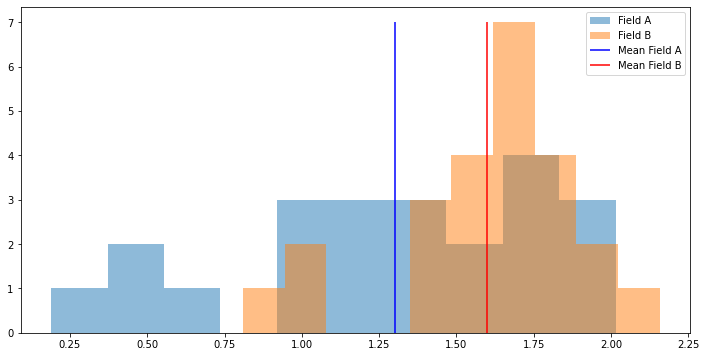

In [ ]:
# Histogram
plt.figure(figsize=(12,6))
# Plot a histogram of the plants' heights.
ya, xa, _ = plt.hist(f_a, bins=10, alpha=0.5, label="Field A")
yb, xb, _ = plt.hist(f_b, bins=10, alpha=0.5, label="Field B")
# Add a vertical line for the mean of field A.
plt.vlines(np.mean(f_a), ymin=0, ymax=max(max(ya), max(yb)), color="blue", label="Mean Field A")
# Add a vertical line for the mean of field B.
plt.vlines(np.mean(f_b), ymin=0, ymax=max(max(ya), max(yb)), color="red", label="Mean Field B")
plt.legend()
plt.show()

The heights are very approximately normally distributed.

Condition fulfilled.

##3) The two samples should have approximately the same variance.

In [ ]:
# Calculate the variance for the plant heights from field A.
var_a = np.var(f_a)
var_a

0.2500038923698874

In [ ]:
# Calculate the variance for the plant heights from field B.
var_b = np.var(f_b)
var_b

0.09001304397217041

As is usually the case in practice, the variances of the two samples are not equal.

For this reason, some people even argue that a Welch's test should always be chosen over a 2-sample t-test: it takes the differences between the variances into account, and returns the same result as the 2-sample t-test whenever variances are equal.

For our little example here, we will assume that the difference between the two variances is still small enough to get useful results from the 2-sample t-test.

In case you don't think that this assumption is convincing, we will also perform a quick Welch's test afterwards so we can compare the outcomes.

Condition fulfilled.

## 4) The data in both samples was obtained using a random sampling method.

This needs to be ensured while collecting the data. At this point, we will assume that the plants were selected randomly.

Condition fulfilled.

# DECIDE ON THE APPROPRIATE TEST TO USE

Comparing the means of two samples with each other is done using a 2-sample t-test.

The associated test statistic is the t-score:  𝑡=𝑥1¯–𝑥2¯𝑠21𝑛1+𝑠22𝑛2√ 

where

𝑥1¯  = mean of sample 1

𝑥2¯  = mean of sample 2

𝑠21  = variance of sample 1

𝑠22  = variance of sample 2

𝑛1  = size of sample 1

𝑛2  = size of sample 2

**The t-score follows a student's t-distribution with n-1 degrees of freedom.(Intuition behind degrees of freedom:**

The question is: how many observations are free to vary with regards to their value, while at the same time keeping the sample mean at this very same value?

The answer is: all but one. 61 observations could have any random value. It would always be possible to set the 62nd value such that the average of all 62 would be equal to the sample mean of our current observation.

Therefore, the degrees of freedom in our case is 61, because 61 observations are free to vary. We deduct 1 from the sample size because we need 1 metric for the test, and thus, 1 value is predetermined (as opposed to free) in its value once that the other 61 observations had the freedom to "choose" their values.)

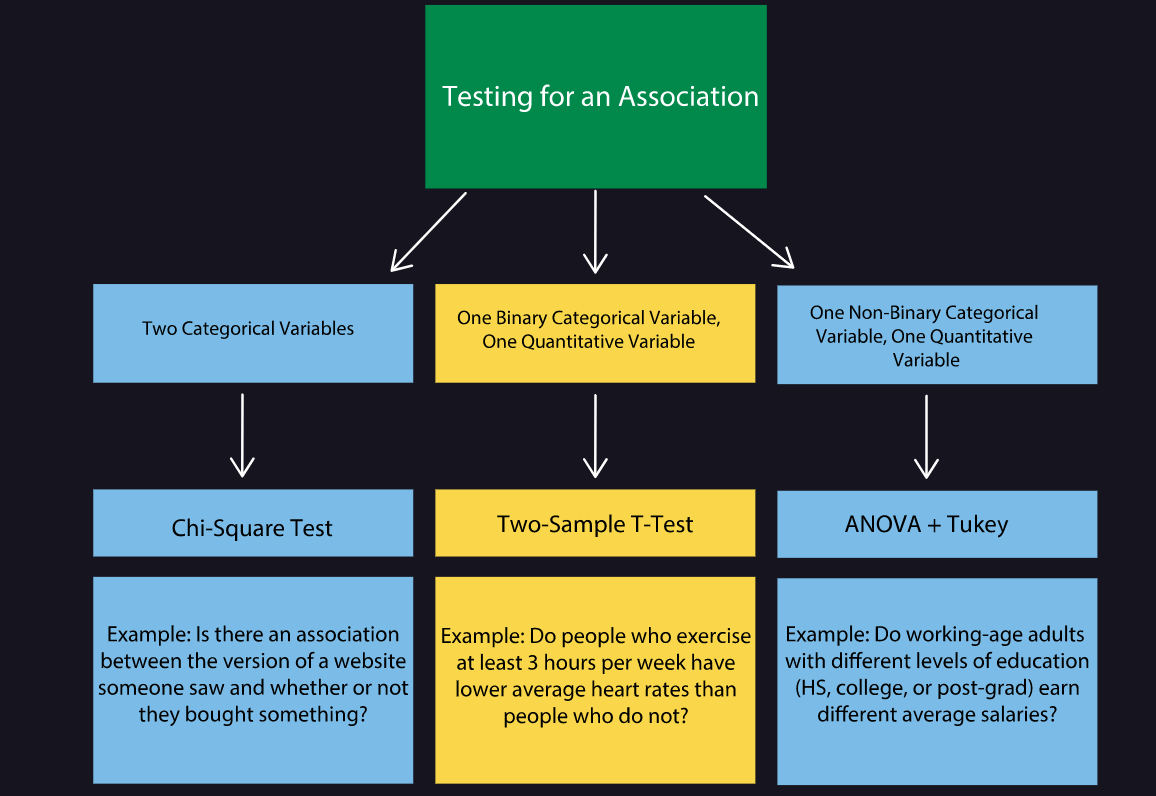

# SELECTING AN APPROPRIATE SIGNIFICANCE LEVEL ALPHA (𝛼)


We need to state the significance level before we look at any data to prevent data snooping.

Alpha denotes the probability of rejecting the Null Hypothesis given that it's true. This can happen when our sample has relatively extreme values, which doesn't often happen - particularly in a well designed experiment. In such extreme cases, we would conclude that the Null Hypothesis would be unlikely (not impossible) and reject it.

Commonly used values for alpha are 0.1, 0.05 and 0.01.

Our alpha value is 0.05.

# 1) MANUAL APPROACH

We want to test the effect of using two different fertilizers on tomato plants. For this, we apply these two fertilizers to the plants in two fields, A and B, and wait for the plants to grow. Then, we take two random samples of plants from both fields and measure their heights. Our goal is to determine if the plants exposed to one of the two fertilizers have grown higher, on average.

>> Set Up the null and alternate hypothesis:

**Null Hypothesis ( 𝐻0 ): mean height of plants in field A = mean height of plants in field B**

(the difference between the mean height of the plants in fields A and B (expressed as d) is zero, so d = 0)

**Alternative Hypothesis ( 𝐻𝐴 ): mean height of plants in field A != mean height of plants in field B**

(the difference between the mean height of the plants in fields A and B is not zero, so d != 0)

In [ ]:
# Get the sample sizes from both fields.
n_a = len(f_a)
n_b = len(f_b)
print("Number of plants from field A: ", n_a)
print("Number of plants from field B: ", n_b)

Number of plants from field A:  22
Number of plants from field B:  24


In [ ]:
# Calculate the degrees of freedom.
degrees_of_freedom = n_a + n_b - 2
degrees_of_freedom

44

Let's plot a t-distribution with 44 degrees of freedom.

In [ ]:
from scipy.stats import t

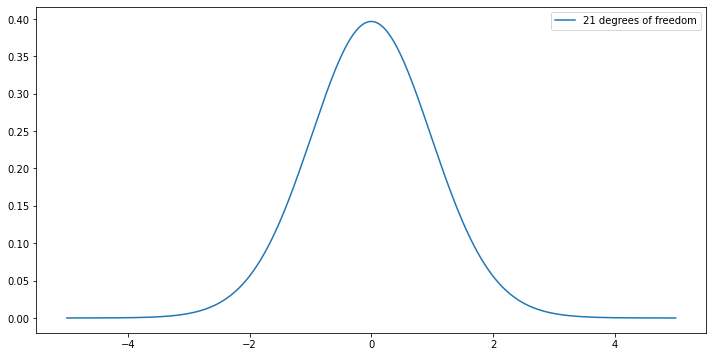

In [ ]:
# @title t-distribution
plt.figure(figsize=(12,6))
# Create a linear space from -5 to 5 with 1000 intervals for our x-axis.
xt = np.linspace(-5,5,1000)
# Plot t-distributions with different degrees of freedom.
plt.plot(xt, t.pdf(xt,44), label="21 degrees of freedom")
plt.legend()
plt.show()

Remember that $t = \frac{\bar{x_1} – \bar{x_2}} {\sqrt{\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2}}}$

In [ ]:
# x1 = mean from field A
x_a = np.mean(f_a)
x_a

1.300054532727273

In [ ]:
# x2 = mean from field B
x_b = np.mean(f_b)
x_b

1.6000459270833332

Remember that we need to specify the delta degrees of freedom (ddof) as 1 in order to calculate the sample standard deviation (ddof = sample size - degrees of freedom).

By default, ddof = 0, which would give the population standard deviation.

In [ ]:
# s1 = standard deviation from field A
s_a = np.std(f_a, ddof=1)
s_a

0.5117702996712454

In [ ]:
# s2 = standard deviation from field B
s_b = np.std(f_b, ddof=1)
s_b

0.30647455780155075

In [ ]:
# n1 = sample size from field A
# n2 = sample size from field B
print("Number of plants from field A: ", n_a)
print("Number of plants from field B: ", n_b)

Number of plants from field A:  22
Number of plants from field B:  24


In [ ]:
# Calculate the t-score with the values from above.
t_score = (x_a - x_b) / np.sqrt((s_a**2 / n_a) + (s_b**2) / n_b)
t_score

-2.3852030326883225

Let's see where the t-score is positioned relative to the t-distribution. 

In [ ]:
# s2 = standard deviation from field B
s_b = np.std(f_b, ddof=1)
s_b

0.30647455780155075

In [ ]:
# n1 = sample size from field A
# n2 = sample size from field B
print("Number of plants from field A: ", n_a)
print("Number of plants from field B: ", n_b)

Number of plants from field A:  22
Number of plants from field B:  24


In [ ]:
# Calculate the t-score with the values from above.
t_score = (x_a - x_b) / np.sqrt((s_a**2 / n_a) + (s_b**2) / n_b)
t_score

-2.3852030326883225

Let's see where the t-score is positioned relative to the t-distribution. 

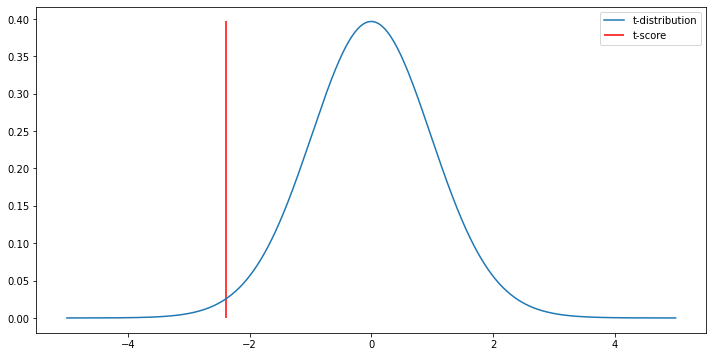

In [ ]:
#@title t-distribution and t-score
plt.figure(figsize=(12,6))
# Plot a t-distribution with the degrees of freedom from our sample.
plt.plot(xt, t.pdf(xt,degrees_of_freedom), label="t-distribution")
# Add a vertical line for the t-score.
plt.vlines(t_score, ymin=0, ymax=max(t.pdf(xt,degrees_of_freedom)), color="red", label="t-score")
plt.legend()
plt.show()

## 8.&nbsp;Derive the critical region associated with the level of alpha.

In the columns at the top, you need to select the level of alpha (make sure to look at the appropriate type of test, one-tailed or two-tailed).

In our case, alpha is 0.05, and we choose to perform a two-tailed test.

Then you select the degrees of freedom of the test statistic's distribution in the first row. For any distribution with a different degree of freedom than the ones listed, the critical value will only be an approximation. In our case, the degrees of freedom is 44. We will choose 2.02 as an approximation for the critical value.

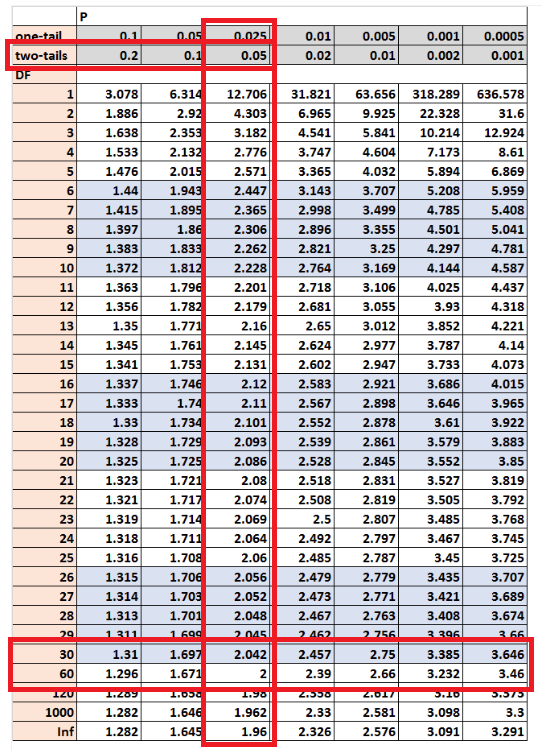

In [ ]:
critical_value = 2.02

Let's plot the t-distribution with our test statistic again.

This time, we want to add the critical values in order to determine the critical region.

Notice that the area shaded in blue under the distribution curve covers all values on the x-axis that are more extreme than our critical values. This area is the alpha, and corresponds thus to about 5% of the total area under the curve.

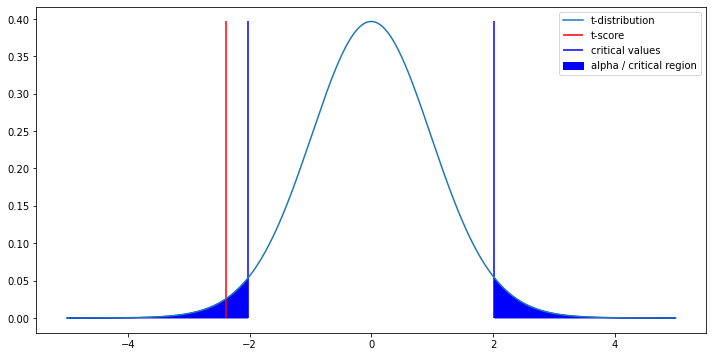

In [ ]:
#@title t-distribution, t-score and critical region
plt.figure(figsize=(12,6))
# Plot a t-distribution with the degrees of freedom from our sample.
plt.plot(xt, t.pdf(xt,degrees_of_freedom), label="t-distribution")
# Add a vertical line for the t-score.
plt.vlines(t_score, ymin=0, ymax=max(t.pdf(xt,degrees_of_freedom)), color="red", label="t-score")
# Add vertical lines for the critical values.
plt.vlines(-critical_value, ymin=0, ymax=max(t.pdf(xt,degrees_of_freedom)), color="blue", label="critical values")
plt.vlines(critical_value, ymin=0, ymax=max(t.pdf(xt,degrees_of_freedom)), color="blue")
# Shade the area under the curve for values more extreme than +/-the critical value (= alpha).
plt.fill_between(xt, t.pdf(xt,degrees_of_freedom), where=(-critical_value>xt)|(xt>critical_value), color= "b", label="alpha / critical region")
plt.legend()
plt.show()

## RESULT

The test statistic is in the critical region because it is more extreme than one of the critical values.

**For this reason, the Null Hypothesis will be rejected. We accept the alternative hypothesis:**

Alternative Hypothesis ( 𝐻𝐴 ): mean height of plants in field A != mean height of plants in field B

(the difference between the mean height of the plants in fields A and B is not zero, so d != 0)

- We can assume that the alternative Hypothesis is true: **There is a statistically significant difference between the means of the control group and the test group.**

- We can assume that the difference in height of the plants from the different fields is not purely due to chance. On the contrary, it is likely that the plants on the different fields have different heights due to the usage of the different fertilizers.

# 2) CODERS APPROACH

The faster way is to use scipy's function to perform 2-sample t-tests.

To determine whether or not to reject the Null Hypothesis, it is common to compare the alpha to the so-called p-value (instead of comparing the test statistic to the critical region).

Note: Whether you compare alpha to the p-value or the test statistic to the critical values/regions is a matter of personal taste. The result itself will always be the same.

We want to test the effect of using two different fertilizers on tomato plants. For this, we apply these two fertilizers to the plants in two fields, A and B, and wait for the plants to grow. Then, we take two random samples of plants from both fields and measure their heights. Our goal is to determine if the plants exposed to one of the two fertilizers have grown higher, on average.

>> Set Up the null and alternate hypothesis:

**Null Hypothesis ( 𝐻0 ): mean height of plants in field A = mean height of plants in field B**

(the difference between the mean height of the plants in fields A and B (expressed as d) is zero, so d = 0)

**Alternative Hypothesis ( 𝐻𝐴 ): mean height of plants in field A != mean height of plants in field B**

(the difference between the mean height of the plants in fields A and B is not zero, so d != 0)

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
alpha = 0.05

In [ ]:
tscore, pvalue = ttest_ind(a = f_a, b = f_b, alternative='two-sided')

In [ ]:
tscore

-2.4358329090845103

In [ ]:
pvalue

0.0189763029680601

Check whether the t-score calculated manually and the one calculated using scipy are the same.

In [ ]:
tscore == t_score

False

Let's run the test again, this time without the equal variance assumption.

> Note: This is the famous Welch's test to be used when the two samples have different variances.

In [ ]:
tscore_2, pvalue_2 = ttest_ind(a = f_a, b = f_b, alternative='two-sided', equal_var=False)

In [ ]:
tscore_2

-2.3852030326883225

In [ ]:
pvalue_2

0.022832240813686074

Check whether the t-score calculated manually and the one calculated using scipy (correcting for unequal variances = Welch's test) are the same.

In [ ]:
tscore_2 == t_score

True

In [ ]:
if pvalue > alpha:
  print("The p-value is larger than alpha.")
else:
  print("The p-value is smaller than alpha.")

The p-value is smaller than alpha.


## RESULT

**Since the p-value is smaller than the alpha, we accept the alternative hypothesis:**


Alternative Hypothesis ( 𝐻𝐴 ): mean height of plants in field A != mean height of plants in field B

(the difference between the mean height of the plants in fields A and B is not zero, so d != 0)

- We can assume that the alternative Hypothesis is true: **There is a statistically significant difference between the means of the control group and the test group.**

- We can assume that the difference in height of the plants from the different fields is not purely due to chance. On the contrary, it is likely that the plants on the different fields have different heights due to the usage of the different fertilizers.